In [1]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt



In [2]:
IMAGE_SIZE =[224,224]
train_path = '/content/drive/MyDrive/Datasets/Train'
test_path = '/content/drive/MyDrive/Datasets/Test'

In [3]:
resnet50 = ResNet50(input_shape = IMAGE_SIZE + [3],weights='imagenet',include_top=False)


94781440/94765736 [==============================] - 1s 0us/step


In [4]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
for layer in resnet50.layers:
   layer.tranable = False

In [6]:
folders = glob('/content/drive/MyDrive/Datasets/Train/*')
folders

['/content/drive/MyDrive/Datasets/Train/audi',
 '/content/drive/MyDrive/Datasets/Train/lamborghini',
 '/content/drive/MyDrive/Datasets/Train/mercedes']

In [7]:
x = Flatten()(resnet50.output)

In [8]:
prediction = Dense(len(folders),activation = 'softmax')(x)
model = Model(inputs = resnet50.input , outputs = prediction )

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale = 1.0/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1.0/255)

In [12]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 58 images belonging to 3 classes.


In [25]:
r = model.fit_generator(training_set,validation_data=test_set,epochs = 50,steps_per_epoch = len(training_set),validation_steps = len(test_set))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
2/2 [==============================] - 3s 1s/step - loss: 0.5942 - accuracy: 0.7812 - val_loss: 48676016.0000 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 2s 1s/step - loss: 0.5274 - accuracy: 0.8750 - val_loss: 32789434.0000 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 1.5421 - accuracy: 0.7969 - val_loss: 16697187.0000 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 2s 1s/step - loss: 16.6370 - accuracy: 0.8594 - val_loss: 13285258.0000 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 2s 1s/step - loss: 0.4554 - accuracy: 0.8281 - val_loss: 5638917.5000 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 2s 1s/step - loss: 6.0249 - accuracy: 0.7500 - val_loss: 1625552.1250 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 2s 1s/step - loss: 5.4321 - accuracy: 0.7500 - val_loss: 7054937.0000 - val_accuracy: 0

In [26]:
r.history

{'accuracy': [0.78125,
  0.875,
  0.796875,
  0.859375,
  0.828125,
  0.75,
  0.75,
  0.796875,
  0.796875,
  0.875,
  0.8125,
  0.890625,
  0.734375,
  0.890625,
  0.875,
  0.765625,
  0.828125,
  0.859375,
  0.84375,
  0.859375,
  0.890625,
  0.9375,
  0.875,
  0.859375,
  0.859375,
  0.890625,
  0.921875,
  0.921875,
  0.921875,
  0.90625,
  0.9375,
  0.875,
  0.9375,
  0.9375,
  0.859375,
  0.953125,
  0.9375,
  0.953125,
  0.96875,
  0.9375,
  0.984375,
  0.953125,
  0.921875,
  0.953125,
  0.9375,
  0.890625,
  0.9375,
  0.984375,
  0.953125,
  0.953125],
 'loss': [0.5942000150680542,
  0.5274341702461243,
  1.542091965675354,
  16.637033462524414,
  0.4553549289703369,
  6.024862766265869,
  5.432145118713379,
  1.881960153579712,
  2.0556719303131104,
  0.4573708176612854,
  0.5374822616577148,
  0.4712849259376526,
  3.8953652381896973,
  4.2434163093566895,
  3.4157216548919678,
  4.043310642242432,
  0.9847037196159363,
  0.5288730263710022,
  0.7906250357627869,
  0.7962156

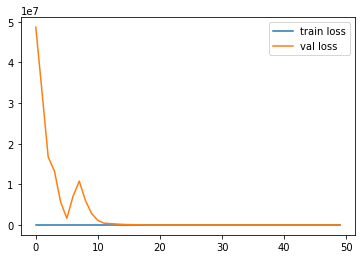

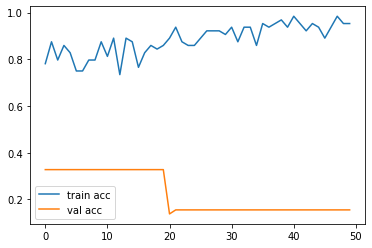

<Figure size 432x288 with 0 Axes>

In [31]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5') 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [29]:
y_pred = model.predict(test_set)

In [30]:
y_pred

array([[0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.35508132, 0.32699242, 0.31792626],
       [0.